In [1]:
library(flowCore)
options(repr.plot.width=14, repr.plot.height=10)

In [50]:
fcs_files <- list.files(path = '/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/fcs_files', pattern='.fcs$', full=TRUE, ignore.case = TRUE)
fcs <- read.FCS(filename=fcs_files[1], transformation=FALSE)

In [51]:
exprs <- fcs@exprs
# Explore the channels (columns in the expression matrix)
fcs@parameters@data

# Make colnames human readable using information in the parameter data slot
markers <- gsub(pattern = ".*_", replacement = "", x = as.vector(fcs@parameters@data$desc))
colnames(exprs)[which(!is.na(markers))] <- markers[which(!is.na(markers))]

,name,desc,range,minRange,maxRange
,<I<chr>>,<I<chr>>,<dbl>,<dbl>,<dbl>
$P1,Time,Time,11309549,0,11309548
$P2,Event_length,Event_length,113,0,112
$P3,Y89Di,CD45,58,0,57
$P4,Pd102Di,102Pd,75,0,74
$P5,Pd104Di,104Pd,1270,0,1269
$P6,Pd105Di,105Pd,1127,0,1126
$P7,Pd106Di,106Pd,61,0,60
$P8,Pd108Di,108Pd,885,0,884
$P9,Cd110Di,CD33,37,0,36


In [52]:
markers

[1] "Time"     "length"   "CD45"     "102Pd"    "104Pd"    "105Pd"   
 [7] "106Pd"    "108Pd"    "CD33"     "CD26"     "CD11c"    "IgD"     
[13] "HLA-DR"   "CD57"     "116Cd"    "131Xe"    "133Cs"    "140Ce"   
[19] "CD49d"    "CD43"     "CD3"      "CD45RB"   "CD81"     "CD52"    
[25] "CD1c"     "CD55"     "CD25"     "CD64"     "CD123"    "TCRgd"   
[31] "Siglec-8" "154Gd"    "CX3CR1"   "CD20"     "CD9"      "CD34"    
[37] "CD22"     "CD14"     "CD161"    "CD29"     "CD137"    "CD62L"   
[43] "CD127"    "CD24"     "CD27"     "CD141"    "CD45RA"   "CD38"    
[49] "CD85j"    "CD147"    "CD56"     "CD99"     "CD28"     "CD39"    
[55] "191Ir"    "193Ir"    "CD8a"     "CD5"      "CD7"      "CD4"     
[61] "CD16"     "Center"   "Offset"   "Width"    "Residual"

In [37]:
A0 <- read.csv('/gpfs/ysm/pi/zhao-data/wd262/new_cytof/CyTOF_classification/write/matrix_A0/A0_covid_Rodrigeuz.csv',header =T, row.names=1)

In [38]:
A0

,CD8.T,CD4.T,Mem.Treg,CD39.Mem.Treg,Naive.Treg,gdT,Naive.B,Memory.B,Plasmablast,NK,pDC,mDC,Monocyte,Eosinophil,Neutrophil,MAIT,CD16..Basophil,CD16..Basophil.1
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CD3,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
IgD,0,0,0,0,0,0,1,-1,0,0,0,0,0,0,0,0,0,0
CD20,0,0,0,0,0,0,1,1,-1,-1,-1,-1,-1,0,0,0,0,0
CD4,-1,1,1,1,1,-1,0,0,0,0,0,0,0,0,0,-1,0,0
CD8a,1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0
CD11c,0,0,0,0,0,0,0,0,0,0,1,-1,0,0,0,0,0,0
CD16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,-1
CD14,0,0,0,0,0,0,0,0,0,-1,-1,-1,1,0,-1,0,0,0
CD45RA,0,0,-1,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
pregating_channels <- c("140Ce", "191Ir", "193Ir", "length")
lineage_channels <- rownames(A0)
instrument_channels <- c("Time", "Center", "Offset", "Width", "Residual")

In [41]:
# Check if counts are randomized (expression matrix should only contain integers)
is.wholenumber <- function(x, tol = .Machine$double.eps^0.5)  abs(x - round(x)) < tol
table(is.wholenumber(exprs[,c(pregating_channels, lineage_channels)]))


  FALSE    TRUE 
2136200 2514784 

In [47]:
# Read in your normalized files and concatenate in a data frame (in this example we subset each matrix to 10,000 random events)
# Remember to set working directory to the normalized samples
#fcs_files <- list.files(path = ".", pattern='.fcs$', full=TRUE, ignore.case = TRUE)
exprs_set <- data.frame()
sample <- c()

for (f in fcs_files) {
  fcs <- read.FCS(filename=f, transformation=FALSE) 
  exprs <- fcs@exprs
  markers <- gsub(pattern = ".*_", replacement = "", x = as.vector(fcs@parameters@data$desc))
  colnames(exprs)[which(!is.na(markers))] <- markers[which(!is.na(markers))]
  set.seed(2021)
  cell.cnt = min(10000,nrow(exprs))
  exprs_set <- rbind(exprs_set, exprs[sample(nrow(exprs), cell.cnt),])
  sample <- append(sample, rep(basename(f), cell.cnt))
}


In [56]:
exprs_set$sample <- sample
instrument_channels <- append(instrument_channels, "sample")

# Make arcsinh transformed expression matrix (excluding channels that should remain linear - e.g. time, event length, etc.)
cofac <- 5 # For CyTOF data, the co-factor is set to 5
exprs_set_trans <- cbind(asinh(exprs_set[,c(pregating_channels[1:4], lineage_channels)]/cofac), exprs_set[,instrument_channels])

In [49]:
library(RColorBrewer)
library(ggplot2)
library(ggridges)
library(cowplot)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”

********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




In [57]:
colnames(exprs_set_trans)[1:3] <- c("Bead","DNA1","DNA2")
pregating_channels <- c("Bead","DNA1","DNA2", "length")

In [58]:
str(exprs_set_trans)

'data.frame':	771218 obs. of  32 variables:
 $ Bead    : num  0 0 0 0 0 ...
 $ DNA1    : num  5.16 5.35 5.52 5.18 6.29 ...
 $ DNA2    : num  5.96 5.95 6.13 5.48 6.86 ...
 $ length  : num  2.14 1.94 2.14 2.09 3.32 ...
 $ CD3     : num  2.957 0 0 0 0.287 ...
 $ IgD     : num  0 0 0 0 0.0163 ...
 $ CD20    : num  0 0 0 0 0.208 ...
 $ CD4     : num  0.49145 0.00486 0.3559 0.01536 0.13824 ...
 $ CD8a    : num  1.176 1.17 0.395 0.357 0.967 ...
 $ CD11c   : num  0 0.0442 1.4165 1.2674 0.1109 ...
 $ CD16    : num  0 4 0 0 4.64 ...
 $ CD14    : num  0 0 2.95 2.87 0 ...
 $ CD45RA  : num  0.2968 0 0.0228 0 0 ...
 $ CD127   : num  0 0 0 0 0.0868 ...
 $ CD33    : num  0 0 0.6504 0.335 0.0363 ...
 $ CD24    : num  0 3.1695 0.0198 0 2.9466 ...
 $ TCRgd   : num  0 0 0 0.122 0 ...
 $ CD123   : num  0 0 0.194 0 0 ...
 $ CD56    : num  0.5771 0.0467 3.1305 1.9382 1.0936 ...
 $ CD25    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ HLA-DR  : num  0 0 0.288 0.347 0 ...
 $ CD161   : num  0.0866 0.0746 0 0.1016 0 ...
 $ 

Picking joint bandwidth of 0.0606

Picking joint bandwidth of 0.052

Picking joint bandwidth of 0.0473

Picking joint bandwidth of 0.0368



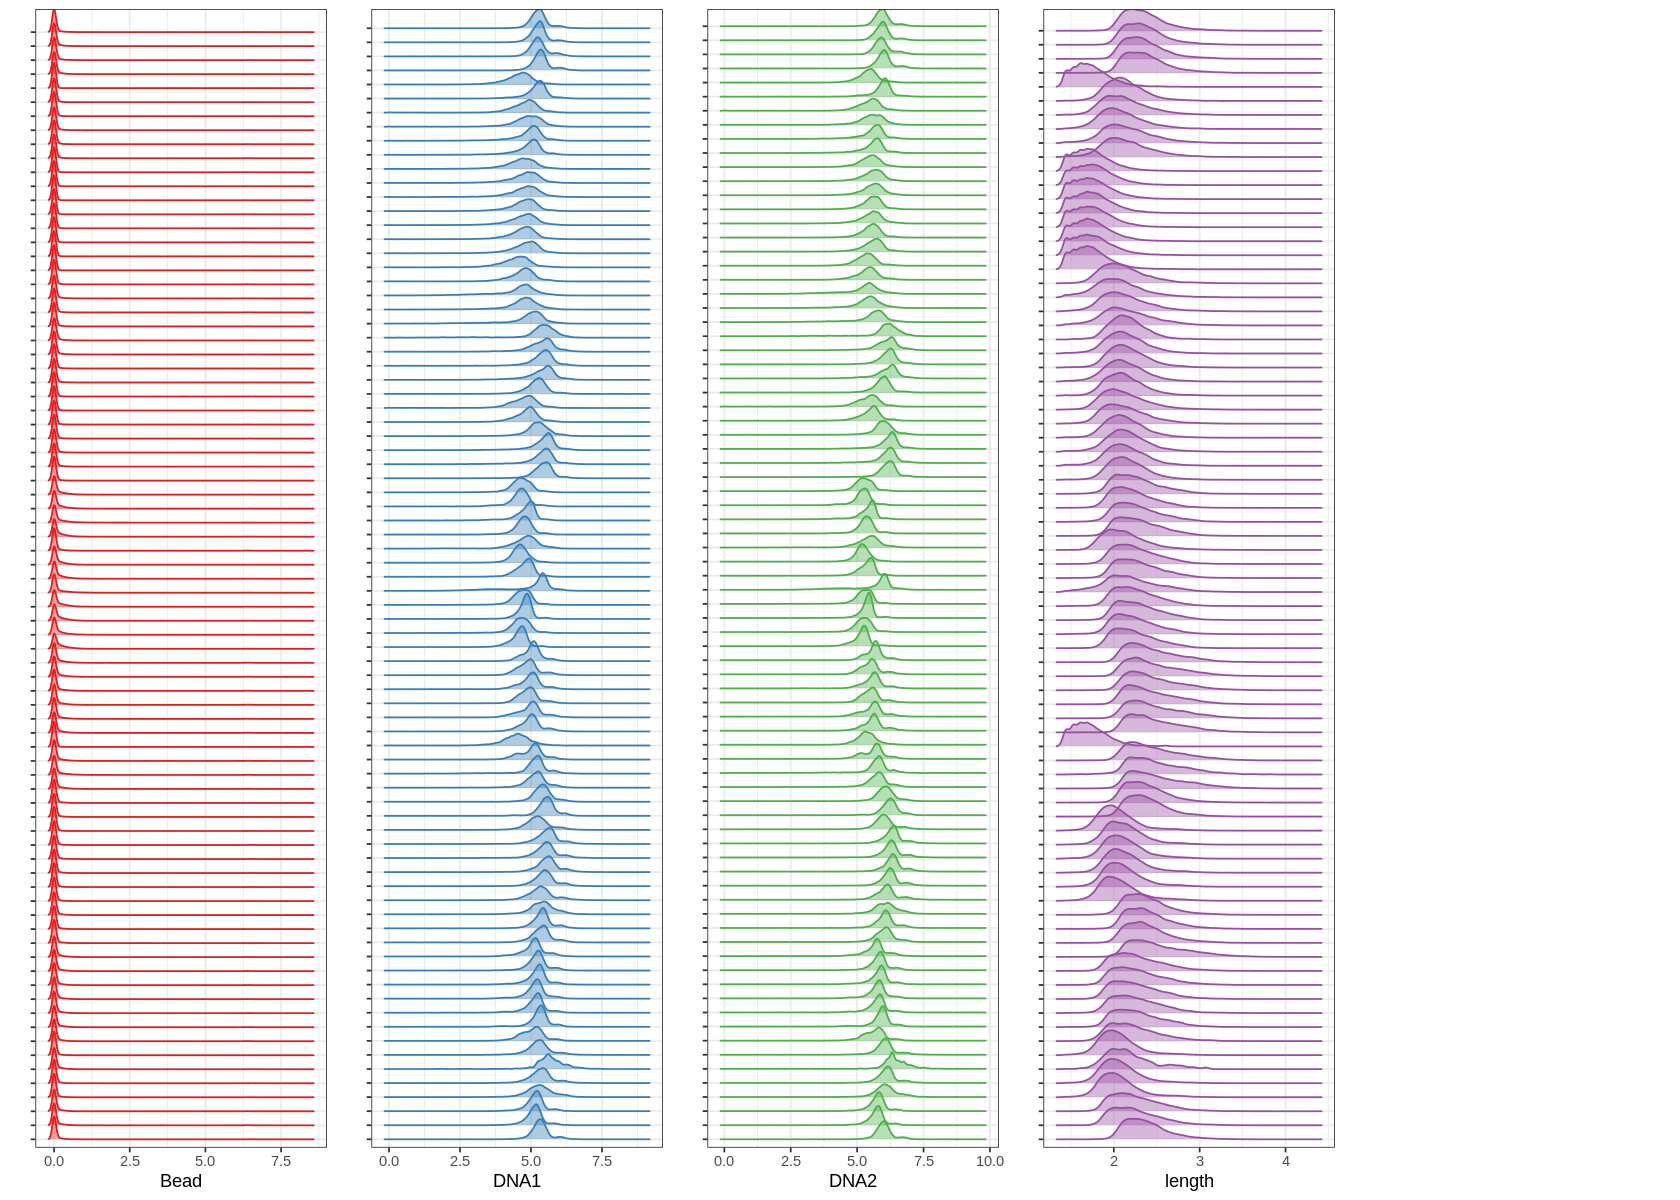

In [61]:
cols <- brewer.pal(5,'Set1')

p <- list()
for (c in 1:length(pregating_channels)) {
  
  p[[c]] <- ggplot(as.data.frame(exprs_set_trans), aes_string(x = pregating_channels[c], y = "sample")) +
            geom_density_ridges(color = cols[c], fill = alpha(cols[c], 0.4)) +
            theme_bw() + theme(axis.text.y=element_blank()) + ylab("")
}

plot_grid(plotlist = p, ncol = 5)

In [62]:
library(MASS)

In [63]:
# Generating a plot for gating visualization
p <- ggplot(exprs_set_trans, aes(x = Bead, y = DNA1)) +
      geom_point(color = 'grey', size = 0.05, alpha = 0.6) +
      geom_density2d(h = max(bandwidth.nrd(exprs_set_trans[,'Bead']), bandwidth.nrd(exprs_set_trans[,'DNA1']))) +
      theme_bw()

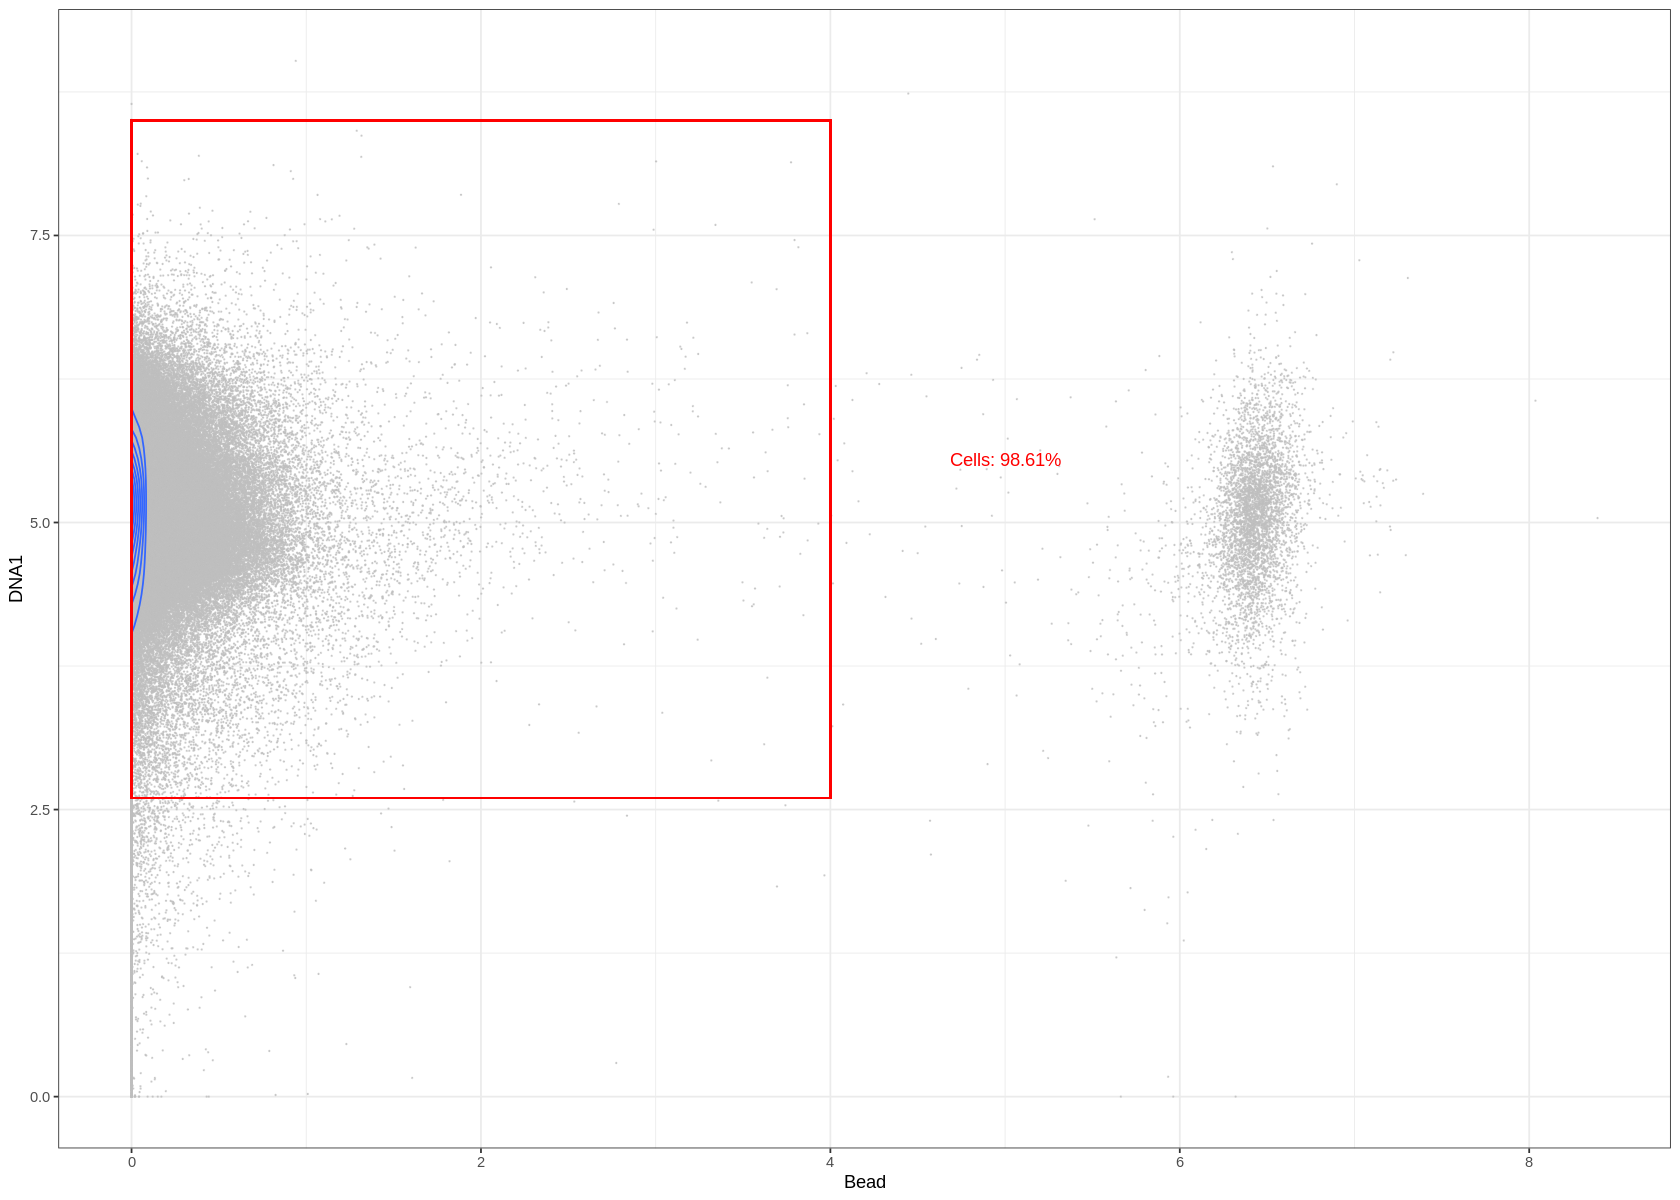

In [65]:
# Set gate boundaries - the values should be manually adjusted
left <- 0; right <- 4; lower <- 2.6; upper <- 8.5

# Gating cells
cells <- exprs_set_trans[exprs_set_trans[,"Bead"] < right,]; cells <- cells[cells[,"DNA1"] > lower & cells[,"DNA1"] < upper,]

# Add gate to plot
p + geom_rect(xmin = left, xmax = right, ymin = lower, ymax = upper, fill = NA, linetype = 1, color = 'red') +
  annotate('text', x = right + 1, y = mean(c(lower, upper)), label = paste("Cells: ", round((nrow(cells)/nrow(exprs_set_trans))*100, digits=2), "%", sep=""), color = 'red')

In [69]:
# Gene rating a plot for gating visualization
p <- ggplot(cells, aes(x = DNA1, y = DNA2)) +
      geom_point(color = 'grey', size = 0.05, alpha = 0.6) +
      coord_cartesian(xlim = c(0,8), ylim = c(2.5,8.5)) +
      geom_density2d() +
      theme_bw()

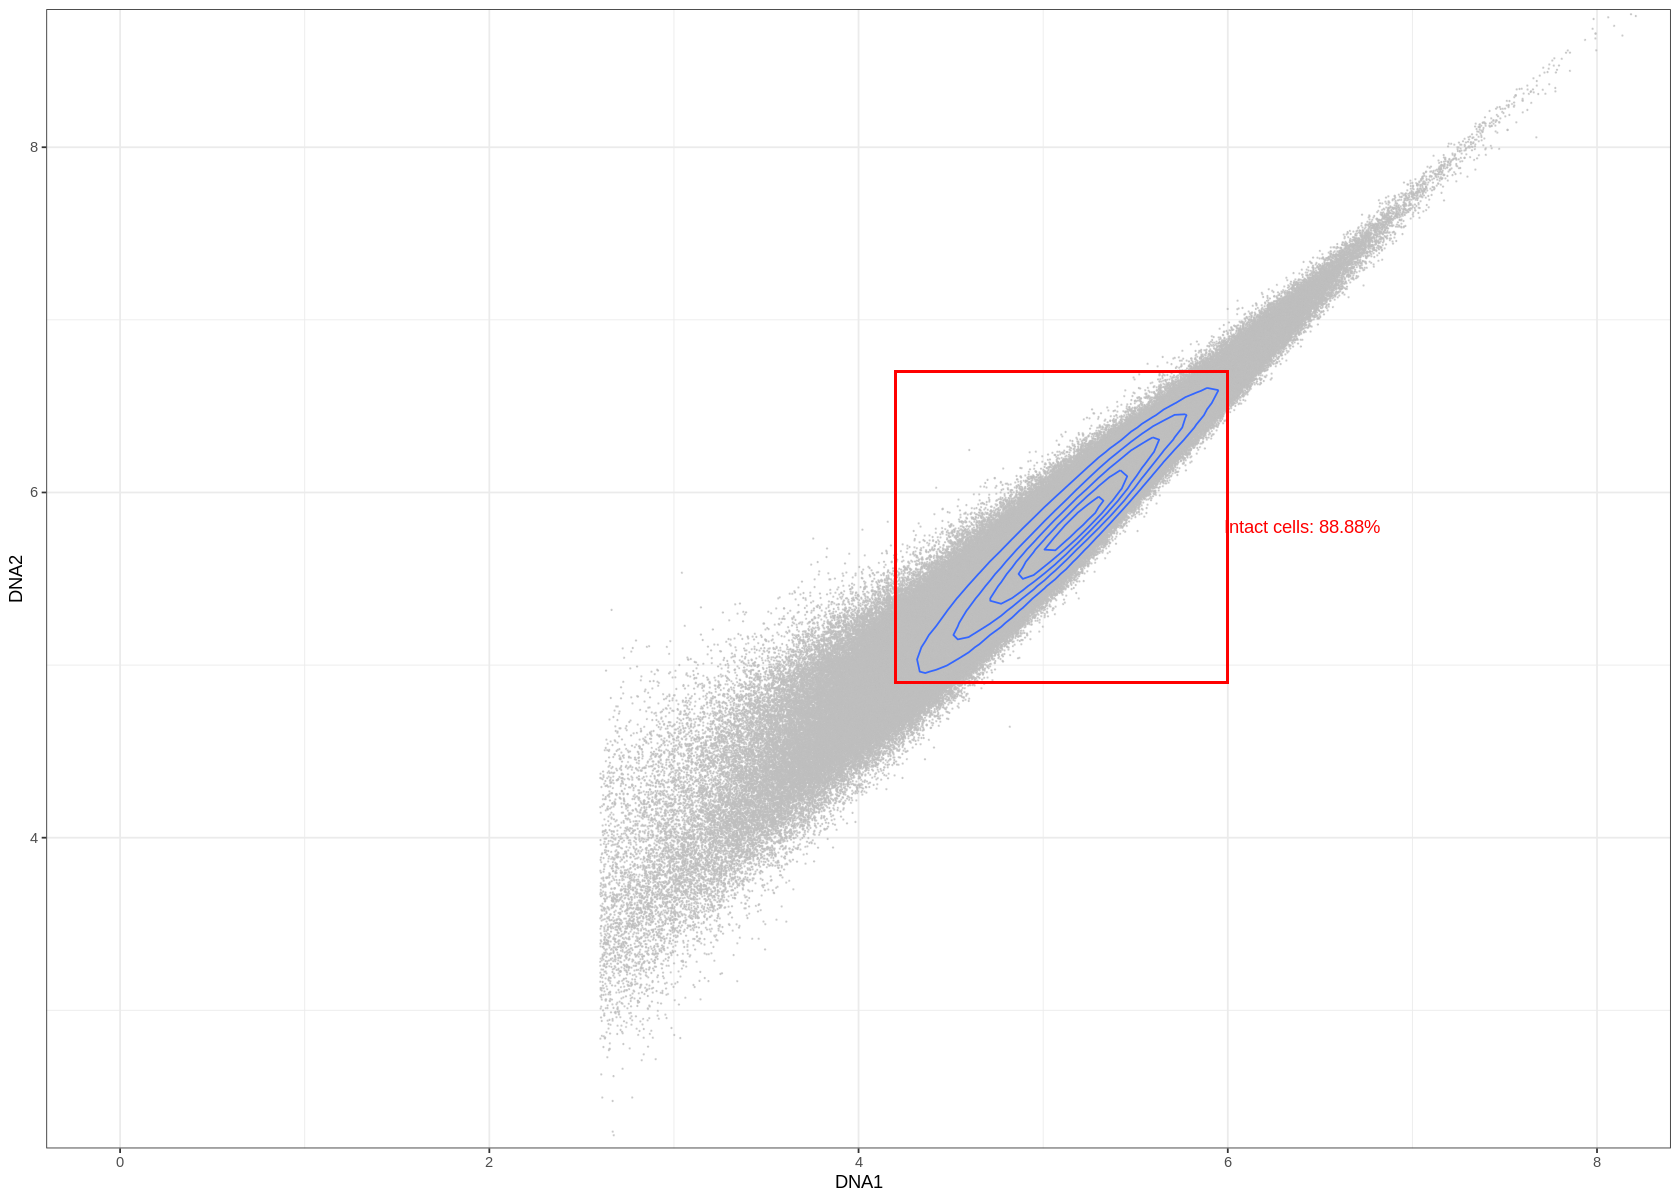

In [71]:
# Set gate boundaries - the values should be manually adjusted
left <- 4.2; right <- 6; lower <- 4.9; upper <- 6.7

# Gating intact cells
intact <- cells[cells[,"DNA1"] > left & cells[,"DNA1"] < right,]; intact <- intact[intact[,"DNA2"] > lower & intact[,"DNA2"] < upper,]

# Add gate to plot
p + geom_rect(xmin = left, xmax = right, ymin = lower, ymax = upper, fill = NA, linetype = 1, color = 'red') +
  annotate('text', x = right + 0.4, y = mean(c(lower, upper)), label = paste("Intact cells: ", round((nrow(intact)/nrow(cells))*100, digits=2), "%", sep=""), color = 'red')

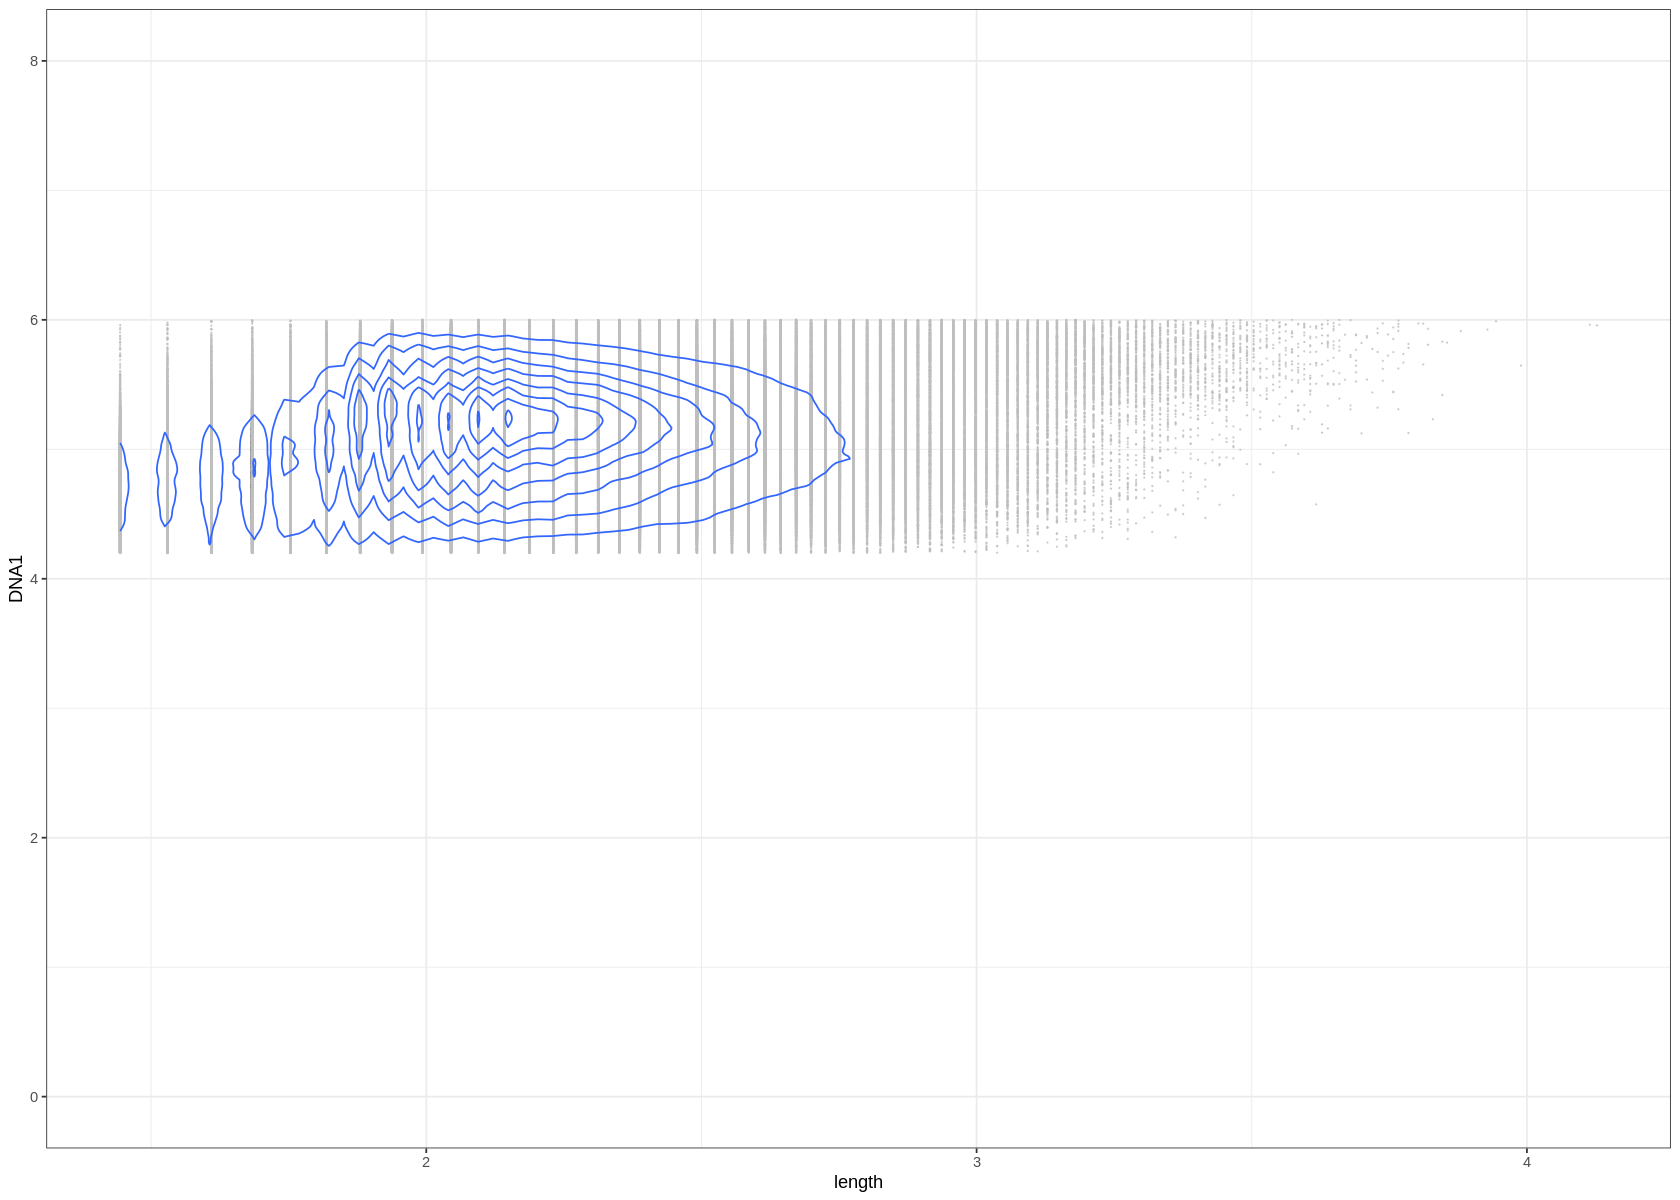

In [73]:
# Generating a plot for gating visualization
p <- ggplot(intact, aes(x = length, y = DNA1)) +
      geom_point(color = 'grey', size = 0.05, alpha = 0.6) +
      coord_cartesian(ylim = c(0,8)) +
      geom_density2d() +
      theme_bw()
p

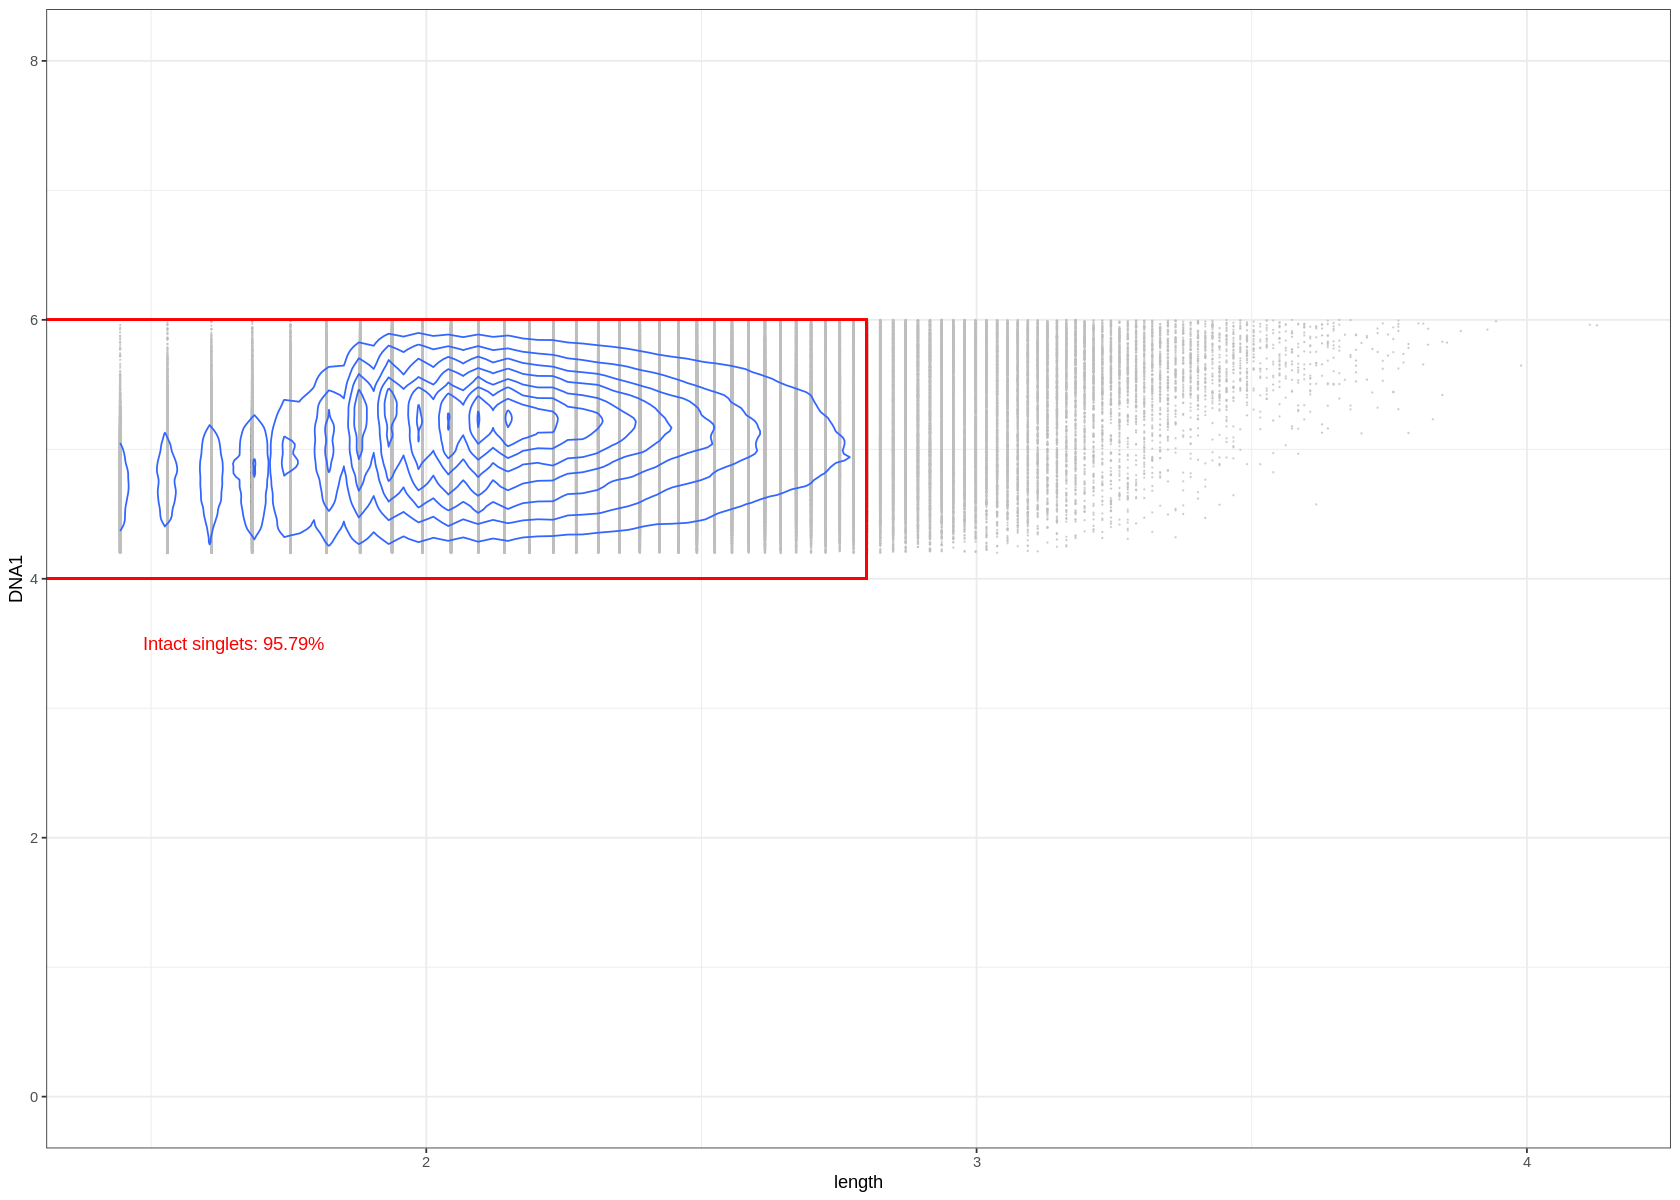

In [75]:
# Set gate boundaries - the values should be manually adjusted
left <- .5; lower <- 4; right <- 2.8; upper <- 6

# Gating intact singlets
singlets <- intact[intact[,"length"] > left & intact[,"length"] < right,]

# Add gate to plot
p + geom_rect(xmin = left, xmax = right, ymin = lower, ymax = upper, fill = NA, linetype = 1, color = 'red') +
  annotate('text', x = mean(c(left, right)), y = lower - 0.5, label = paste("Intact singlets: ", round((nrow(singlets)/nrow(intact))*100, digits=2), "%", sep=""), color = 'red')

In [76]:
str(singlets)

'data.frame':	647441 obs. of  32 variables:
 $ Bead    : num  0 0 0 0 0 ...
 $ DNA1    : num  5.16 5.35 5.52 5.18 5.58 ...
 $ DNA2    : num  5.96 5.95 6.13 5.48 6.35 ...
 $ length  : num  2.14 1.94 2.14 2.09 1.94 ...
 $ CD3     : num  2.957 0 0 0 0.185 ...
 $ IgD     : num  0 0 0 0 0.308 ...
 $ CD20    : num  0 0 0 0 0.16 ...
 $ CD4     : num  0.49145 0.00486 0.3559 0.01536 0 ...
 $ CD8a    : num  1.176 1.17 0.395 0.357 0.266 ...
 $ CD11c   : num  0 0.0442 1.4165 1.2674 0 ...
 $ CD16    : num  0 4 0 0 3.74 ...
 $ CD14    : num  0 0 2.95 2.87 0 ...
 $ CD45RA  : num  0.2968 0 0.0228 0 0.1841 ...
 $ CD127   : num  0 0 0 0 0 ...
 $ CD33    : num  0 0 0.65 0.335 0 ...
 $ CD24    : num  0 3.1695 0.0198 0 2.7047 ...
 $ TCRgd   : num  0 0 0 0.122 0 ...
 $ CD123   : num  0 0 0.194 0 0 ...
 $ CD56    : num  0.5771 0.0467 3.1305 1.9382 0 ...
 $ CD25    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ HLA-DR  : num  0 0 0.288 0.347 0 ...
 $ CD161   : num  0.0866 0.0746 0 0.1016 0 ...
 $ CD28    : num  0.0413 0 0

In [80]:
saveRDS(singlets,'/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/exprs_trans_singlets.rds')

In [53]:
markers.all = markers

In [54]:
A0 <- read.csv('/gpfs/ysm/pi/zhao-data/wd262/new_cytof/CyTOF_classification/write/matrix_A0/A0_covid_Rodrigeuz.csv',header =T, row.names=1)
fcs_files <- list.files(path = '/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/fcs_files', pattern='.fcs$', full=TRUE, ignore.case = TRUE)
pregating_channels <- c("140Ce", "191Ir", "193Ir", "length")
lineage_channels <- rownames(A0)
instrument_channels <- c("Time", "Center", "Offset", "Width", "Residual","sample")
other_channels <- setdiff(markers.all, c(pregating_channels,lineage_channels,instrument_channels))
cofac <- 5

In [55]:
other_channels

[1] "CD45"   "102Pd"  "104Pd"  "105Pd"  "106Pd"  "108Pd"  "CD26"   "CD57"  
 [9] "116Cd"  "131Xe"  "133Cs"  "CD49d"  "CD43"   "CD45RB" "CD81"   "CD52"  
[17] "CD1c"   "CD64"   "154Gd"  "CX3CR1" "CD9"    "CD34"   "CD22"   "CD29"  
[25] "CD137"  "CD62L"  "CD141"  "CD85j"  "CD147"  "CD99"   "CD39"   "CD5"   
[33] "CD7"

In [56]:
#exprs_set <- data.frame()
sample.list <- c()
savefile.list <- c()
sample.id.prev <- "  "
for (f in fcs_files) {
   # f = fcs_files[1]
    pregating_channels <- c("140Ce", "191Ir", "193Ir", "length")
instrument_channels <- c("Time", "Center", "Offset", "Width", "Residual","sample")

    
  fcs <- read.FCS(filename=f, transformation=FALSE) 
  exprs <- data.frame(fcs@exprs)
  markers <- gsub(pattern = ".*_", replacement = "", x = as.vector(fcs@parameters@data$desc))
  colnames(exprs)[which(!is.na(markers))] <- markers[which(!is.na(markers))]
  set.seed(2021)
  cell.cnt = min(20000,nrow(exprs))
  exprs <- exprs[sample(nrow(exprs), cell.cnt),]
    
    sample.id <- paste0(strsplit(basename(f),"_")[[1]][1],"_",strsplit(basename(f),"_")[[1]][2])
  if(sample.id.prev == sample.id)
      sample.id <- paste0(sample.id,".2")
    sample <- rep(sample.id, cell.cnt)
    sample.id.prev <- sample.id
    print(sample.id)
               
  exprs$sample <- sample
    sample.list <- append(sample.list, sample.id)


# Make arcsinh transformed expression matrix (excluding channels that should remain linear - e.g. time, event length, etc.)
#cofac <- 5 # For CyTOF data, the co-factor is set to 5
#print(dim(asinh(exprs[,c(pregating_channels[1:4], lineage_channels)]/cofac)))
#print(dim(exprs[,instrument_channels]))

  exprs_trans <- cbind(asinh(exprs[,c(pregating_channels[1:4], lineage_channels, other_channels)]/cofac), exprs[,instrument_channels])

    colnames(exprs_trans)[1:3] <- c("Bead","DNA1","DNA2")
    pregating_channels <- c("Bead","DNA1","DNA2", "length")
# Set gate boundaries - the values should be manually adjusted
left <- 0; right <- 4; lower <- 2.6; upper <- 8.5

# Gating cells
cells <- exprs_trans[exprs_trans[,"Bead"] < right,]; cells <- cells[cells[,"DNA1"] > lower & cells[,"DNA1"] < upper,]
    
    # Set gate boundaries - the values should be manually adjusted
left <- 4.2; right <- 6; lower <- 4.9; upper <- 6.7

# Gating intact cells
intact <- cells[cells[,"DNA1"] > left & cells[,"DNA1"] < right,]; intact <- intact[intact[,"DNA2"] > lower & intact[,"DNA2"] < upper,]

# Set gate boundaries - the values should be manually adjusted
left <- 4.2; right <- 6; lower <- 4.9; upper <- 6.7

# Gating intact cells
intact <- cells[cells[,"DNA1"] > left & cells[,"DNA1"] < right,]; intact <- intact[intact[,"DNA2"] > lower & intact[,"DNA2"] < upper,]

    # Set gate boundaries - the values should be manually adjusted
left <- .5; lower <- 4; right <- 2.8; upper <- 6

# Gating intact singlets
singlets <- intact[intact[,"length"] > left & intact[,"length"] < right,]

    savefile.dir <- paste0("/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/",sample.id,".rds")
    savefile.list <- append(savefile.list, savefile.dir)
    saveRDS(singlets, savefile.dir)
}

[1] "COV-10_20200408"
[1] "COV-11_20200408"
[1] "COV-12_20200409"
[1] "COV-13_20200408"
[1] "COV-14_20200408"
[1] "COV-15_20200408"
[1] "COV-16_20200408"
[1] "COV-17_20200408"
[1] "COV-18_20200409"
[1] "COV-19_20200409"
[1] "COV-20_20200409"
[1] "COV-21_20200409"
[1] "COV-22_20200409"
[1] "COV-23_20200409"
[1] "COV-24_20200412"
[1] "COV-24_20200413"
[1] "COV-24_20200415"
[1] "COV-26_20200414"
[1] "COV-26_20200415"
[1] "COV-26_20200416"
[1] "COV-26_20200417"
[1] "COV-26_20200418"
[1] "COV-26_20200420"
[1] "COV-27_20200415"
[1] "COV-27_20200416"
[1] "COV-29_20200418"
[1] "COV-29_20200419"
[1] "COV-29_20200422"
[1] "COV-3_20200408"
[1] "COV-30_20200422"
[1] "COV-31_20200422"
[1] "COV-32_20200421"
[1] "COV-32_20200427"
[1] "COV-32_20200430"
[1] "COV-33_20200421"
[1] "COV-34_20200421"
[1] "COV-34_20200422"
[1] "COV-34_20200423"
[1] "COV-34_20200424"
[1] "COV-34_20200424.2"
[1] "COV-34_20200426"
[1] "COV-34_20200428"
[1] "COV-34_20200430"
[1] "COV-34_20200501"
[1] "COV-34_20200502"
[1] "COV-

In [24]:
cbind(sample.list, savefile.list)

sample.list,savefile.list
COV-10_20200408,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-10_20200408.rds
COV-11_20200408,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-11_20200408.rds
COV-12_20200409,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-12_20200409.rds
COV-13_20200408,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-13_20200408.rds
COV-14_20200408,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-14_20200408.rds
COV-15_20200408,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-15_20200408.rds
COV-16_20200408,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-16_20200408.rds
COV-17_20200408,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-17_20200408.rds
COV-18_20200409,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-18_20200409.rds
COV-19_20200409,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-19_20200409.rds


In [46]:
metadata <- read.csv('/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/meta_data.csv',header=T,row.names=1)

In [41]:
metadata$dir =  savefile.list
write.csv(metadata, '/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/meta_data.csv',row.names=T)

In [47]:
metadata

,Sample.ID,Subject.ID,Patient_Group,Date,Days_After_Admission,dir
,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
1,COV-10_20200408,COV-10,Recovery,2020-04-08,0,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-10_20200408.rds
2,COV-11_20200408,COV-11,Recovery,2020-04-08,0,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-11_20200408.rds
3,COV-12_20200409,COV-12,NA,NA,NA,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-12_20200409.rds
4,COV-13_20200408,COV-13,Recovery,2020-04-08,0,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-13_20200408.rds
5,COV-14_20200408,COV-14,Recovery,2020-04-08,0,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-14_20200408.rds
6,COV-15_20200408,COV-15,Recovery,2020-04-08,0,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-15_20200408.rds
7,COV-16_20200408,COV-16,Recovery,2020-04-08,0,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-16_20200408.rds
8,COV-17_20200408,COV-17,Recovery,2020-04-08,0,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-17_20200408.rds
9,COV-18_20200409,COV-18,Recovery,2020-04-09,0,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-18_20200409.rds
